In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

large_models_df = pd.read_csv("large_scale_ai_models.csv")
notable_models_df = pd.read_csv("notable_ai_models.csv")
cooling_df = pd.read_csv("cooling_type_data.csv")
carbon_df = pd.read_csv("carbon_intensity_electricity.csv")

large_models_df['Publication date'] = pd.to_datetime(large_models_df['Publication date'], errors='coerce')
large_models_df['Year'] = large_models_df['Publication date'].dt.year
large_models_df['Training compute (FLOP)'] = pd.to_numeric(large_models_df['Training compute (FLOP)'], errors='coerce')
large_models_df = large_models_df.dropna(subset=['Year', 'Training compute (FLOP)'])

top_large_models = large_models_df.sort_values('Training compute (FLOP)', ascending=False).drop_duplicates(subset=['Year'])
top_large_models = top_large_models[['Model', 'Year', 'Training compute (FLOP)']].copy()
top_large_models['key'] = 1

cooling_df = cooling_df.drop_duplicates(subset=['Cooling System']).copy()
cooling_df['key'] = 1

combined = pd.merge(top_large_models, cooling_df, on='key').drop(columns='key')

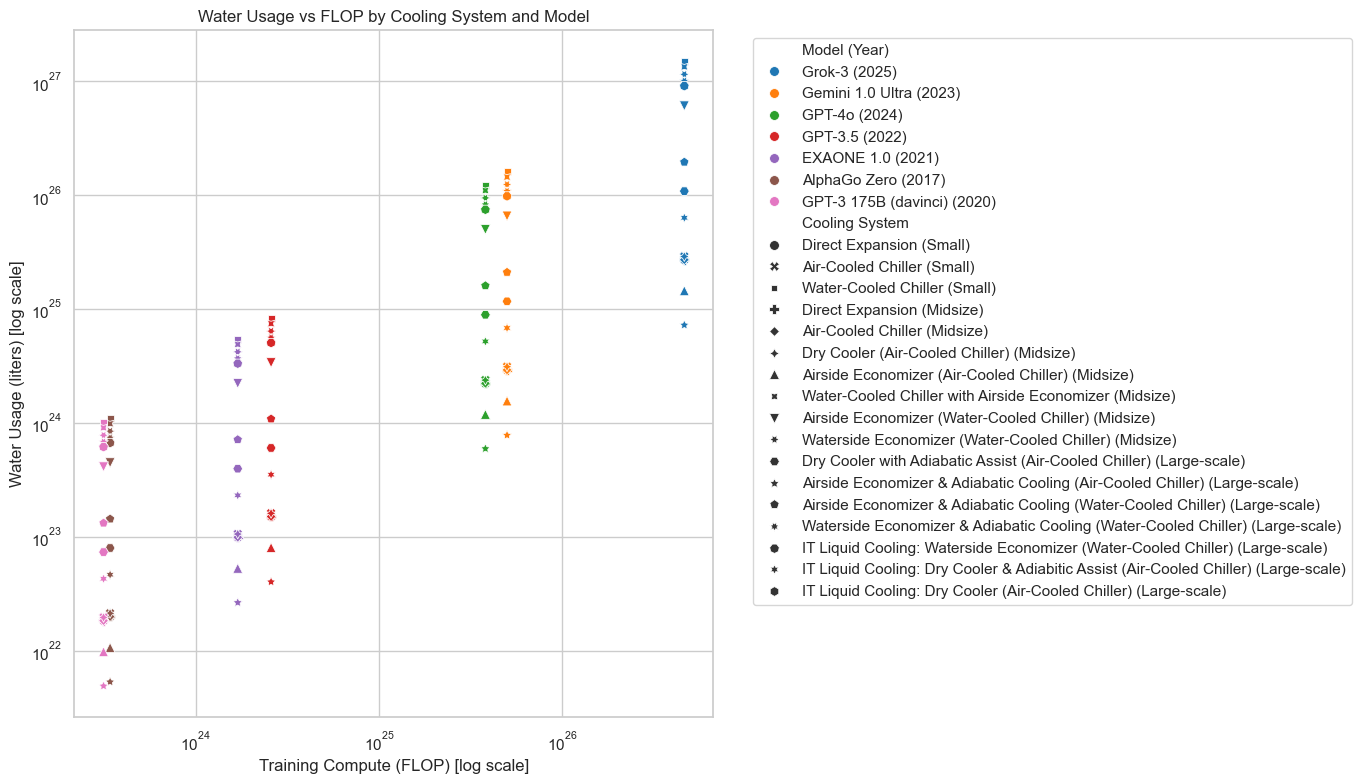

In [150]:
combined['Water Usage'] = combined['AvgWUE'] * combined['Training compute (FLOP)']
combined['Model (Year)'] = combined['Model'] + " (" + combined['Year'].astype(str) + ")"

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plot = sns.scatterplot(
    data=combined,
    x='Training compute (FLOP)',
    y='Water Usage',
    hue='Model (Year)',
    style='Cooling System',
    palette='tab10',
    s=50
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Training Compute (FLOP) [log scale]')
plt.ylabel('Water Usage (liters) [log scale]')
plt.title('Water Usage vs FLOP by Cooling System and Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [151]:
TFLOPS_PER_SECOND = 67  # Processing speed in TFLOPS

combined['Training Time (s)'] = combined['Training compute (FLOP)'] / (TFLOPS_PER_SECOND * 1e12)

combined['Total Power (W)'] = (combined['AvgPUE'] + 1) * combined['Training compute (FLOP)']
combined['Energy (Joules)'] = combined['Total Power (W)'] * combined['Training Time (s)']
combined['Energy (kWh)'] = combined['Energy (Joules)'] / (3.6e6)  # Convert Joules to kWh

carbon_df = carbon_df.rename(columns={'Carbon intensity of electricity - gCO2/kWh': 'Carbon Intensity (kg CO2 per kWh)'})
carbon_df['Carbon Intensity (kg CO2 per kWh)'] = carbon_df['Carbon Intensity (kg CO2 per kWh)'] / 1000

carbon_df_usa = carbon_df[carbon_df['Entity'] == 'United States'].copy()

combined = pd.merge(combined, carbon_df_usa[['Year', 'Carbon Intensity (kg CO2 per kWh)']], on='Year', how='left')

combined['Carbon Impact (kg CO2)'] = combined['Energy (kWh)'] * combined['Carbon Intensity (kg CO2 per kWh)']

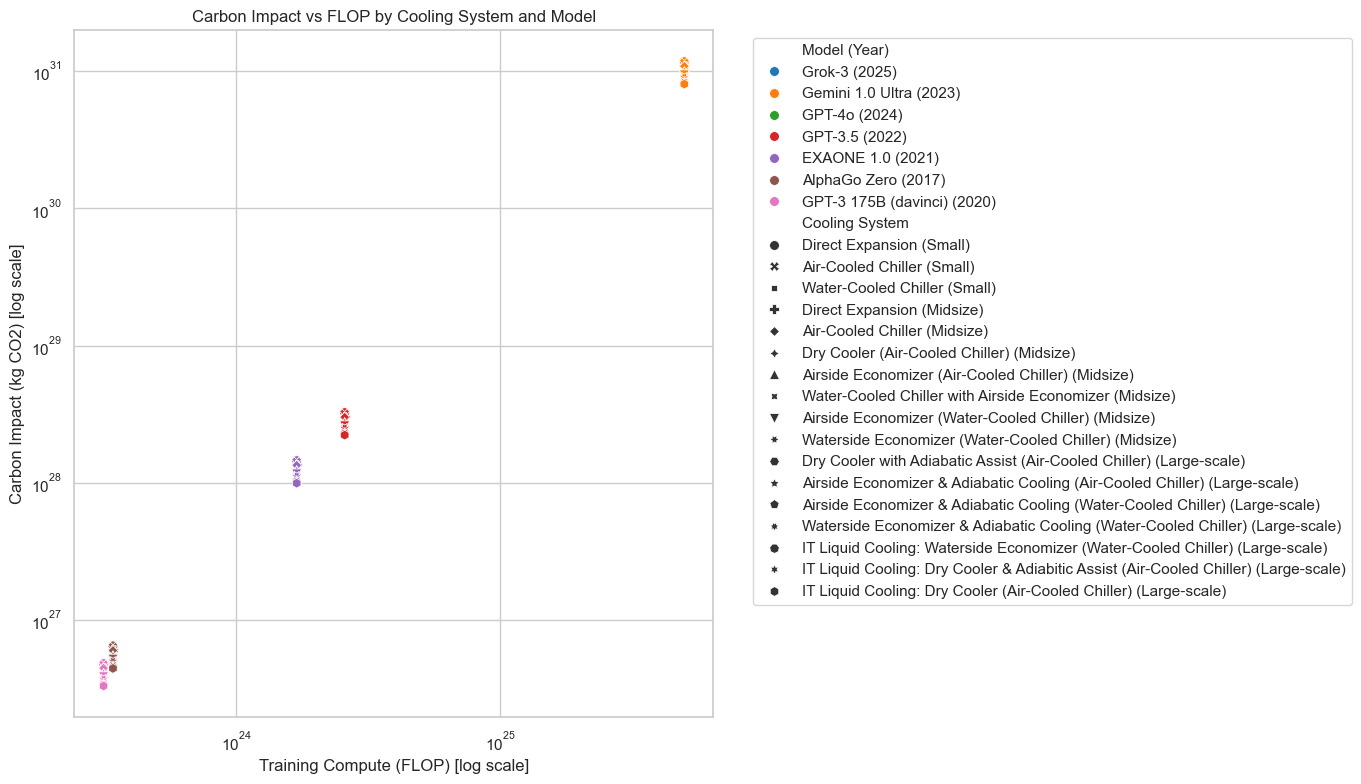

In [152]:
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plot = sns.scatterplot(
    data=combined,
    x='Training compute (FLOP)',
    y='Carbon Impact (kg CO2)',
    hue='Model (Year)',
    style='Cooling System',
    palette='tab10',
    s=50,
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Training Compute (FLOP) [log scale]')
plt.ylabel('Carbon Impact (kg CO2) [log scale]')
plt.title('Carbon Impact vs FLOP by Cooling System and Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [153]:
large_models_df = pd.read_csv("large_scale_ai_models.csv")
notable_models_df = pd.read_csv("notable_ai_models.csv")
cooling_df = pd.read_csv("cooling_type_data.csv")
carbon_df = pd.read_csv("carbon_intensity_electricity.csv")

notable_models_df['Publication date'] = pd.to_datetime(notable_models_df['Publication date'], errors='coerce')
notable_models_df['Year'] = notable_models_df['Publication date'].dt.year
notable_models_df['Training compute (FLOP)'] = pd.to_numeric(notable_models_df['Training compute (FLOP)'], errors='coerce')
notable_models_df = notable_models_df.dropna(subset=['Year', 'Training compute (FLOP)'])

notable_models_df = notable_models_df[notable_models_df['Year'].between(2017, 2023)]

top_notable_models = notable_models_df.sort_values('Training compute (FLOP)', ascending=False).drop_duplicates(subset=['Year'])
top_notable_models = top_notable_models[['Model', 'Year', 'Training compute (FLOP)']].copy()
top_notable_models['key'] = 1

cooling_df = cooling_df.drop_duplicates(subset=['Cooling System']).copy()
cooling_df['key'] = 1

combined = pd.merge(top_notable_models, cooling_df, on='key').drop(columns='key')

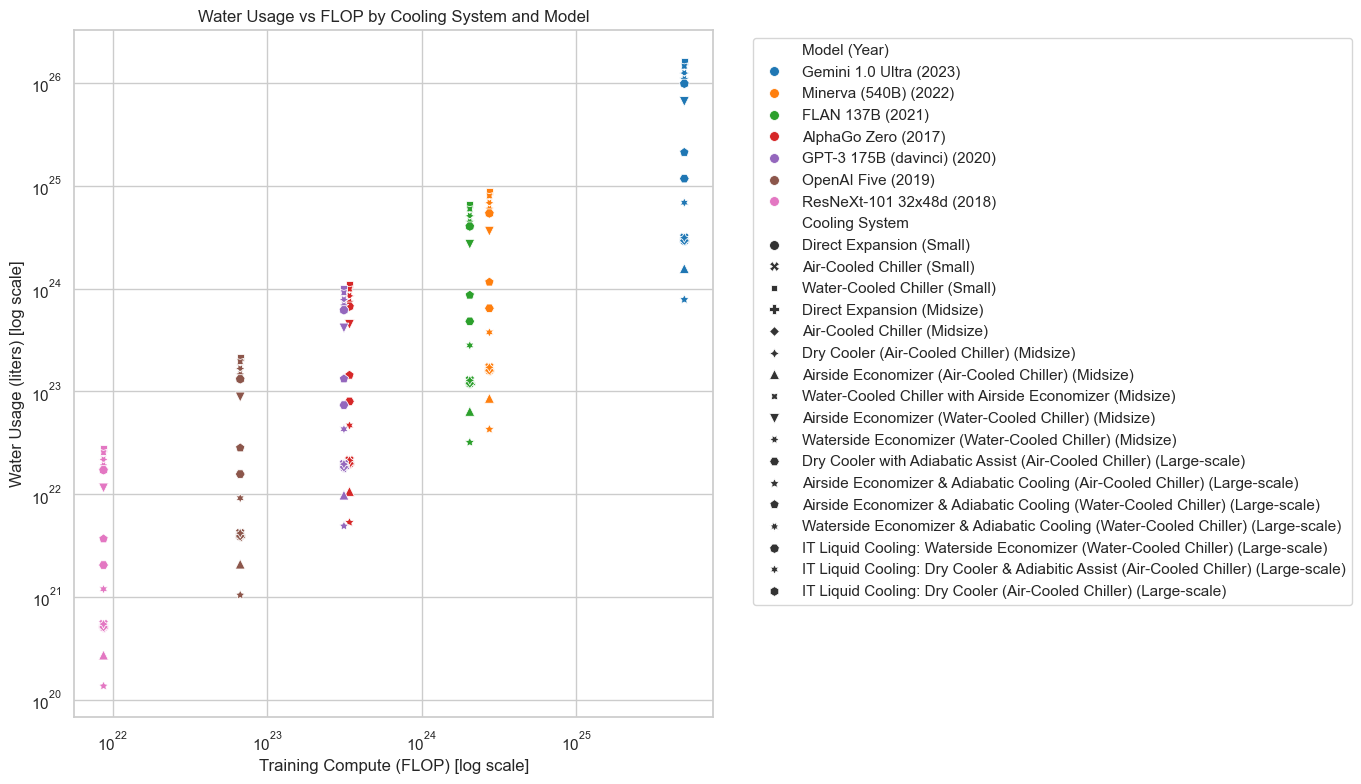

In [154]:
combined['Water Usage'] = combined['AvgWUE'] * combined['Training compute (FLOP)']
combined['Model (Year)'] = combined['Model'] + " (" + combined['Year'].astype(str) + ")"

plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plot = sns.scatterplot(
    data=combined,
    x='Training compute (FLOP)',
    y='Water Usage',
    hue='Model (Year)',
    style='Cooling System',
    palette='tab10',
    s=50
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Training Compute (FLOP) [log scale]')
plt.ylabel('Water Usage (liters) [log scale]')
plt.title('Water Usage vs FLOP by Cooling System and Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [155]:
TFLOPS_PER_SECOND = 67  # Processing speed in TFLOPS

combined['Training Time (s)'] = combined['Training compute (FLOP)'] / (TFLOPS_PER_SECOND * 1e12)

combined['Total Power (W)'] = (combined['AvgPUE'] + 1) * combined['Training compute (FLOP)']
combined['Energy (Joules)'] = combined['Total Power (W)'] * combined['Training Time (s)']
combined['Energy (kWh)'] = combined['Energy (Joules)'] / (3.6e6)  # Convert Joules to kWh

carbon_df = carbon_df.rename(columns={'Carbon intensity of electricity - gCO2/kWh': 'Carbon Intensity (kg CO2 per kWh)'})
carbon_df['Carbon Intensity (kg CO2 per kWh)'] = carbon_df['Carbon Intensity (kg CO2 per kWh)'] / 1000

carbon_df_usa = carbon_df[carbon_df['Entity'] == 'United States'].copy()

combined = pd.merge(combined, carbon_df_usa[['Year', 'Carbon Intensity (kg CO2 per kWh)']], on='Year', how='left')

combined['Carbon Impact (kg CO2)'] = combined['Energy (kWh)'] * combined['Carbon Intensity (kg CO2 per kWh)']

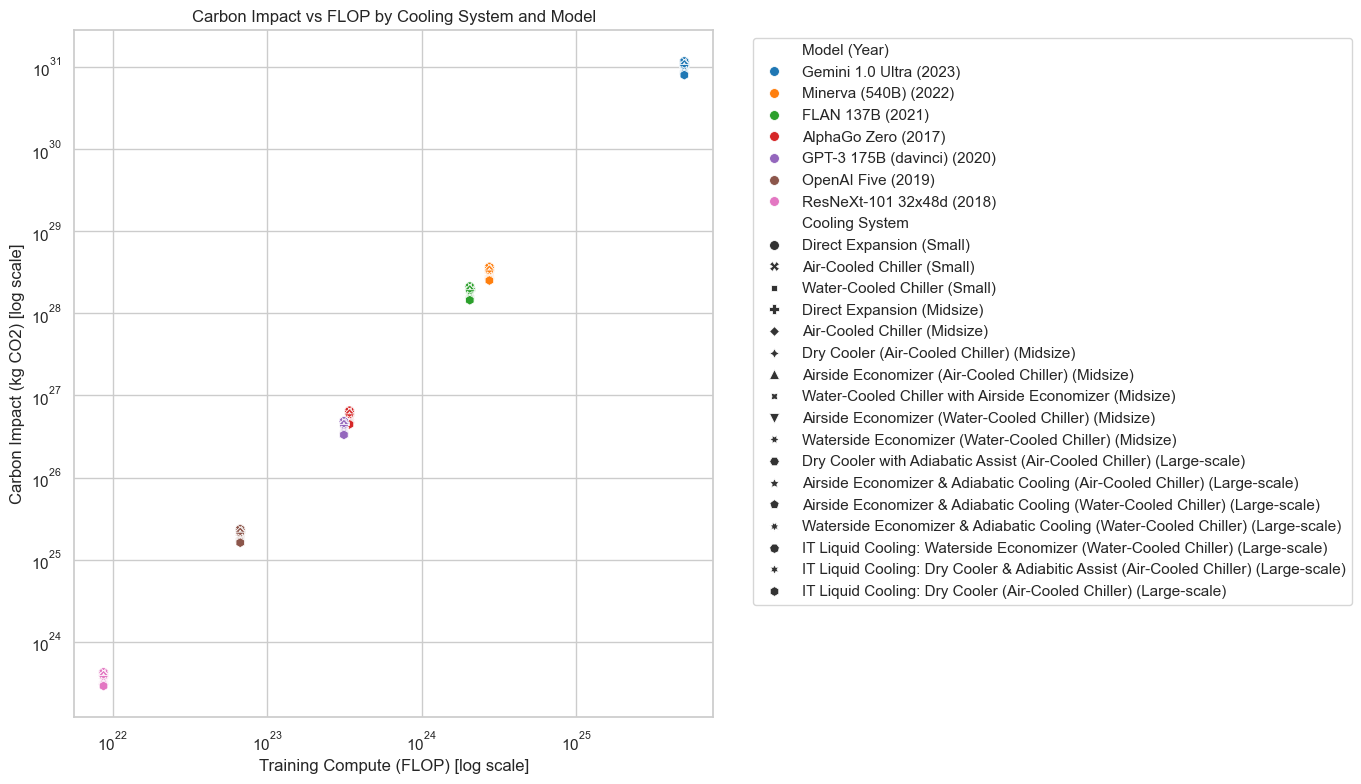

In [156]:
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")

plot = sns.scatterplot(
    data=combined,
    x='Training compute (FLOP)',
    y='Carbon Impact (kg CO2)',
    hue='Model (Year)',
    style='Cooling System',
    palette='tab10',
    s=50,
)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Training Compute (FLOP) [log scale]')
plt.ylabel('Carbon Impact (kg CO2) [log scale]')
plt.title('Carbon Impact vs FLOP by Cooling System and Model')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()